In [2]:
import pandas, matplotlib.pyplot as plt

In [3]:
df = pandas.read_table('exported.txt')
samples = df['Sample Name']
zeta = df['Zeta Potential (mV)']

samples = samples.str.split('(\d+)([A-Za-z]+)',expand=True)
samples.drop(0, axis=1, inplace=True)
samples.columns = ['pH_nominal', 'mortality', 'run']
samples['pH'] = ""

actual_pHs = {'2':2.01,
              '4':4.01,
              '6':6.01,
              '8':8.01,
              '10':10.01,
              '12':12.01}

for pH_string in actual_pHs:
    samples.loc[samples['pH_nominal'] == pH_string, 'pH'] = actual_pHs[pH_string]
    
df_sz = pandas.concat([samples, zeta], axis=1)

duds = df_sz.loc[df_sz['run'].str.contains("_") == True]
duds_indices = duds.index.values

df_sz = df_sz.drop(duds_indices)

No handles with labels found to put in legend.


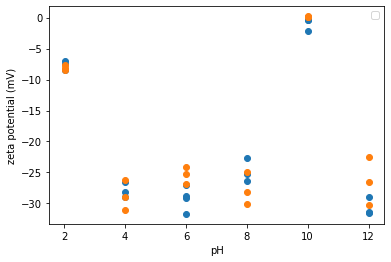

In [7]:
df_alive = df_sz.loc[df_sz['mortality'] == 'a']
df_dead = df_sz.loc[df_sz['mortality'] == 'd']

dfs_by_mortality = [df_alive, df_dead]
mortalities = ['a', 'd']
labels_by_mortality = ['uninhibited', 'inhibited']

legend_by_mortality = dict(zip(mortalities, labels_by_mortality))
# colors_by_mortality = []

for df in dfs_by_mortality:
    plt.plot(df['pH'], 
             df['Zeta Potential (mV)'],
             'o') 
#              label=legend_by_mortality[df_dead['mortality'][0]])
    
plt.xlabel('pH')
plt.ylabel('zeta potential (mV)')
plt.legend()
plt.show()

In [6]:
legend_by_mortality[df_alive['mortality'][0]]

'uninhibited'